# Библиотека SEIRS+

In [1]:
from seirsplus.models import *
from seirsplus.networks import *
import networkx as nx
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt 
import time

# Вспомогательные функции

Состояния вершин для простейшего SEIRS: 
- self.S          = 1   'green'
- self.E          = 2   'yellow'
- self.I          = 3   'red'
- self.R          = 4   'blue'

Отображение состояний в цвета для рисования

In [2]:
def ColorMapSEIR(NodeStates):
    NodeColors=[]
    for State in NodeStates:
        if State == [1]:
            NodeColors.append('green')
        elif State == [2]:
            NodeColors.append('yellow')
        elif State == [3]:
            NodeColors.append('red')
        elif State == [4]:
            NodeColors.append('blue')
        else:
            NodeColors.append('black')
    return NodeColors

Рисование графа с состояниями SEIRS

In [3]:
def DrawGraphSEIRS(Graph, NodeStates, pos):
    nx.draw_networkx(Graph, node_color=ColorMapSEIR(NodeStates),pos=pos, alpha=0.8, with_labels=True)
    plt.show()

# Пример SEIRS на маленьком графе

Цель: 
- Пронаблюдать процесс повершинно
- Научиться подавать в модель состояния вершин графа
- Научиться работать с transmissibility 

## Создадим маленький граф

In [32]:
nodes = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30] 
edges = [(1,2),(1,3),(1,4),(1,5),(2,3),(2,4),(2,5),(3,4),(3,5),(4,5),
         (6,7),(6,8),(6,9),(6,10),(7,8),(7,9),(7,10),(8,9),(8,10),(9,10),
         (11,12),(11,13),(11,14),(11,15),(12,13),(12,14),(12,15),(13,14),(13,15),(14,15),
         (16,17),(16,18),(16,19),(16,20),(17,18),(17,19),(17,20),(18,19),(18,20),(19,20),
         (21,22),(21,23),(21,24),(21,25),(22,23),(22,24),(22,25),(23,24),(23,25),(24,25),
         (26,27),(26,28),(26,29),(26,30),(27,28),(27,29),(27,30),(28,29),(28,30),(29,30),
         (0,1),(0,6),(0,11),(0,16),(0,21),(0,26),
         (2,7),(8,13),(14,19),(20,25),(22,27),(28,3),
         (1,6),(6,11),(11,16),(16,21),(21,26),(26,1)
        ]
G = nx.Graph() 
G.add_nodes_from(nodes) 
G.add_edges_from(edges) 
pos = nx.spring_layout(G)# фиксируем положения вершин

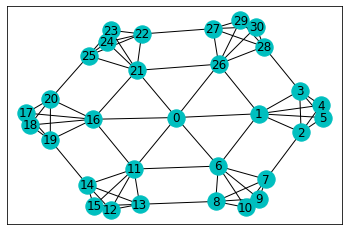

In [50]:

nx.draw_networkx(G, node_color='c',pos=pos, with_labels=True)
plt.show()

## Зададим модель SEIR

<img width=400 src="https://raw.githubusercontent.com/ryansmcgee/seirsplus/master/images/BasicSEIRS_compartments_resus.png">

Начальное состояние графа

In [58]:
NodeStates=[[2], #0
            [1],[1],[1],[1],[1], #1,2,3,4,5
            [1],[1],[1],[1],[1], #6,7,8,9,10
            [1],[1],[1],[1],[1], #11,12,13,14,15
            [1],[1],[1],[1],[1], #16,17,18,19,20
            [1],[1],[1],[1],[1], #21,22,23,24,25
            [1],[1],[1],[1],[1],] #26,27,27,29,30

In [69]:
model = SEIRSNetworkModel(G=G, beta=0.45, sigma=1/5.1, gamma=1/7, initE=0)
model.X=np.array(NodeStates)

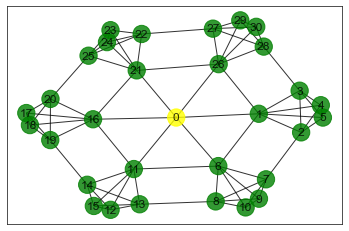

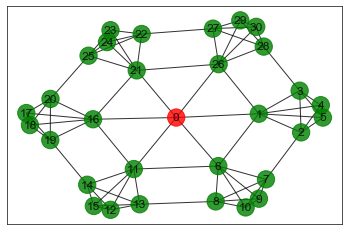

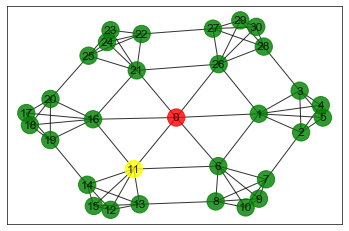

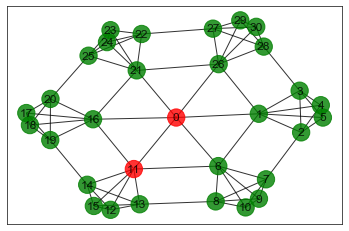

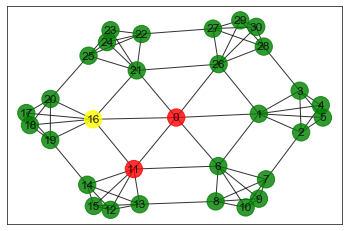

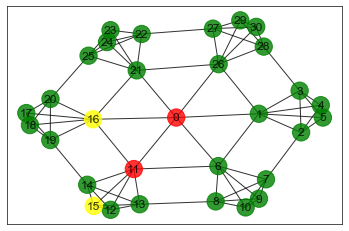

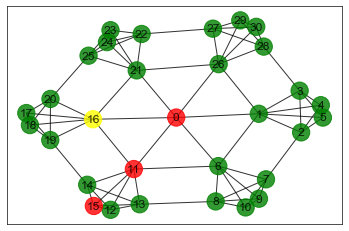

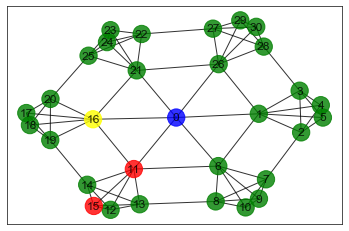

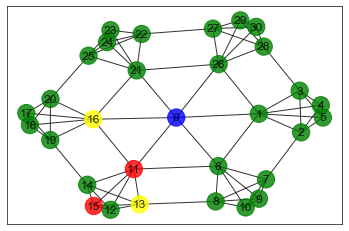

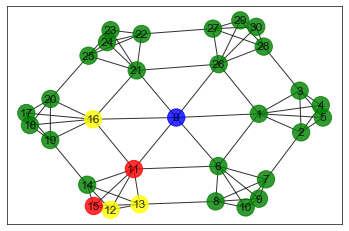

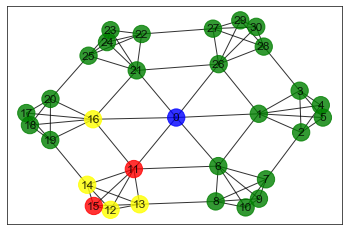

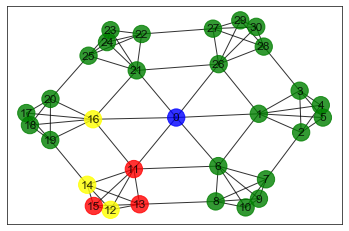

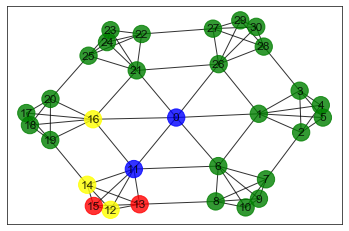

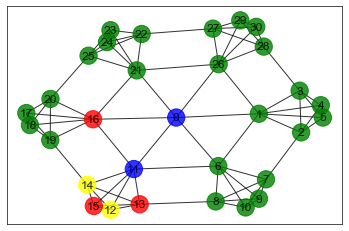

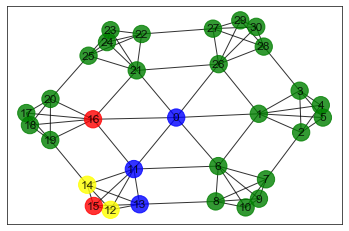

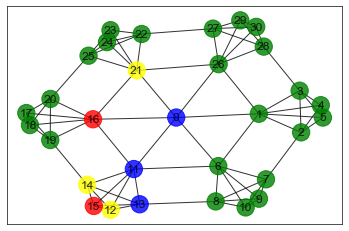

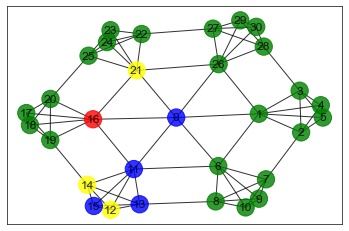

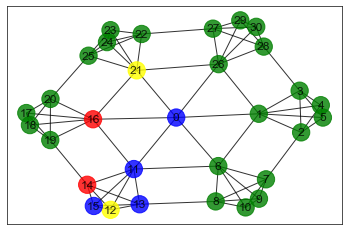

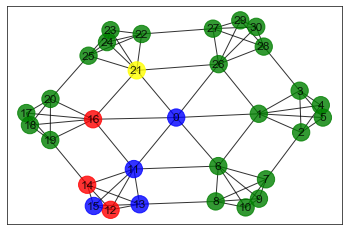

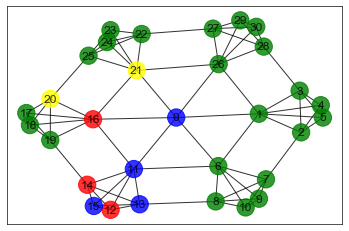

In [70]:
NumIter=20
for i in tqdm(range(NumIter)):
    DrawGraphSEIRS(G, model.X, pos)
    running = model.run_iteration()

t = 30.22
t = 50.44


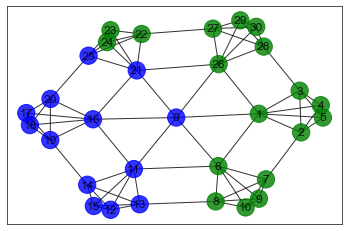

In [71]:
running = model.run(T=100)
DrawGraphSEIRS(G, model.X, pos)

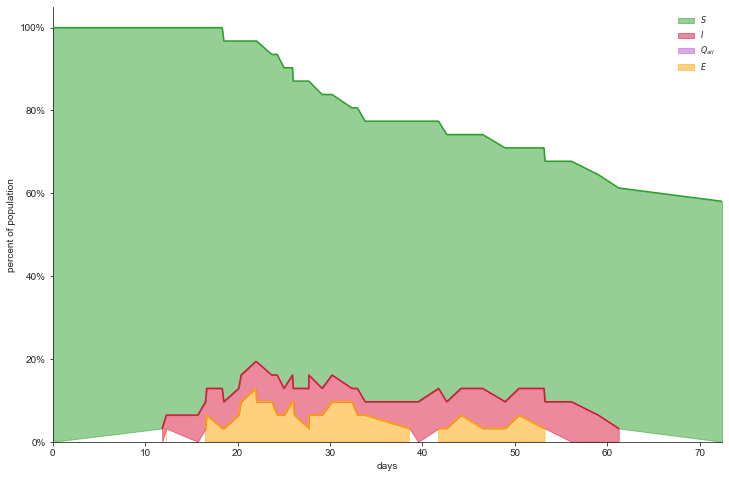

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8313719b50>)

In [72]:
model.figure_infections(plot_S='stacked',plot_E='stacked',plot_I='stacked')

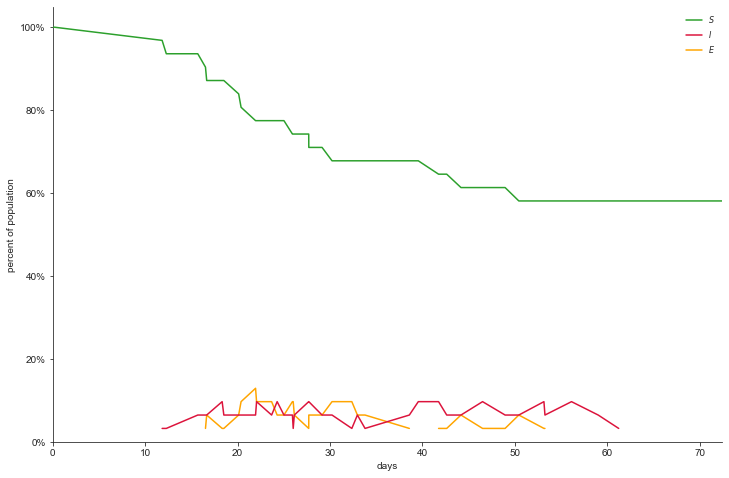

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8313607f10>)

In [73]:
model.figure_basic()

### Матрица значений парной проницаемости

In [98]:
model = SEIRSNetworkModel(G=G, beta=0, sigma=1/5.1, gamma=1/7, initE=0)
model.X=np.array(NodeStates)

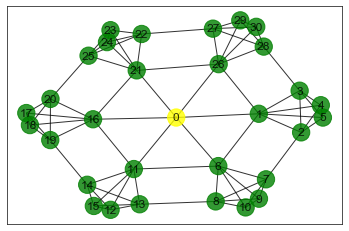

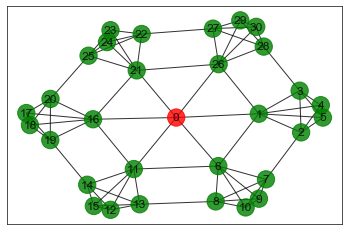

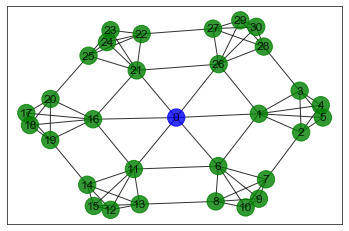

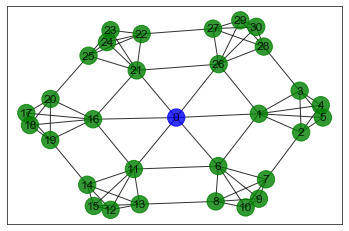

In [99]:
NumIter=4
for i in tqdm(range(NumIter)):
    DrawGraphSEIRS(G, model.X, pos)
    running = model.run_iteration()

In [100]:
model = SEIRSNetworkModel(G=G, beta=0.8, sigma=1/5.1, gamma=1/7, initE=0)
model.X=np.array(NodeStates)

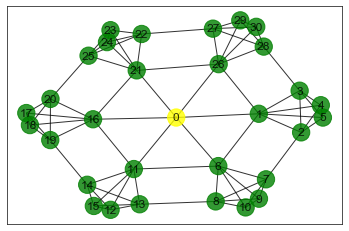

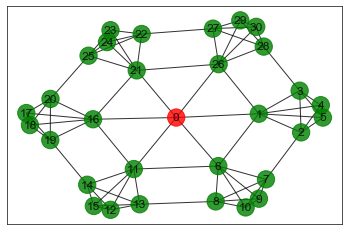

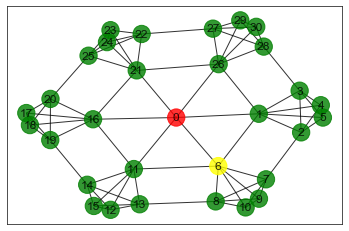

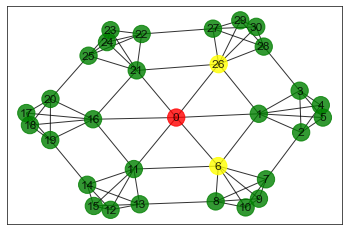

In [101]:
NumIter=4
for i in tqdm(range(NumIter)):
    DrawGraphSEIRS(G, model.X, pos)
    running = model.run_iteration()

In [123]:
beta_infect=np.zeros(31)
beta_infect[0]=0.9
beta_infect

array([0.9, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. ])

In [130]:
model = SEIRSNetworkModel(G=G, beta=0, beta_local=beta_infect, sigma=1/5.1, gamma=1/7, initE=1)
model.X=np.array(NodeStates)

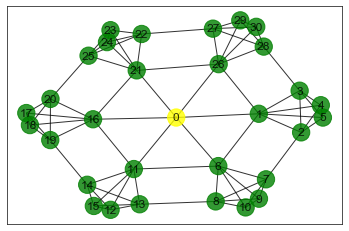

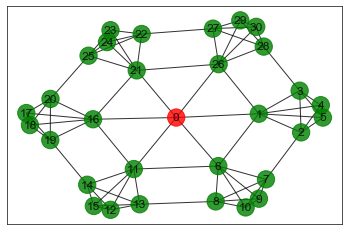

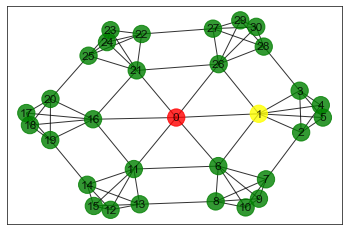

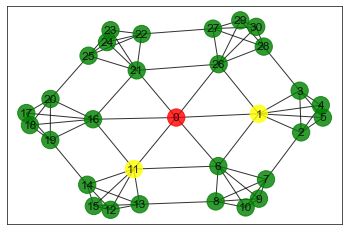

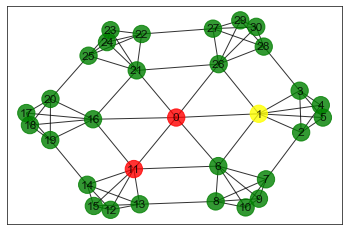

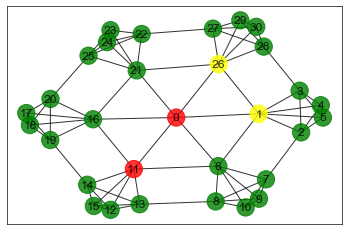

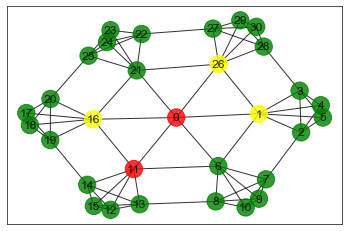

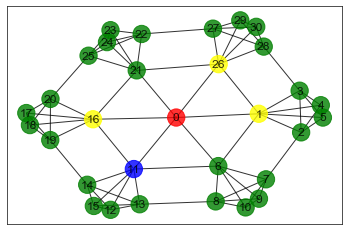

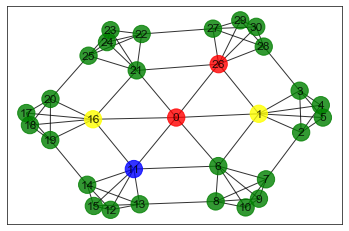

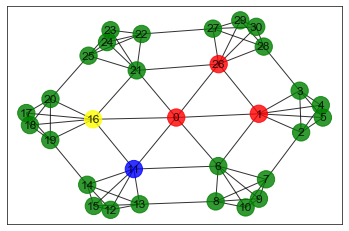

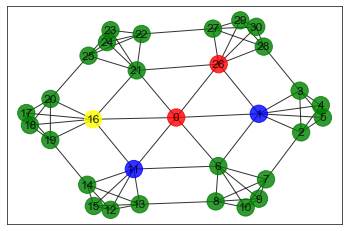

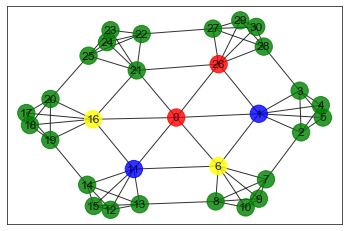

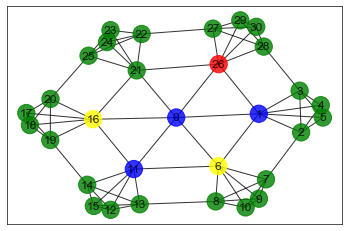

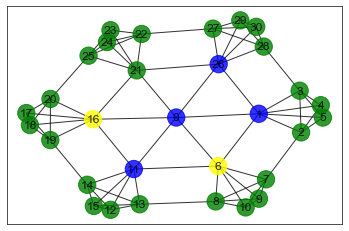

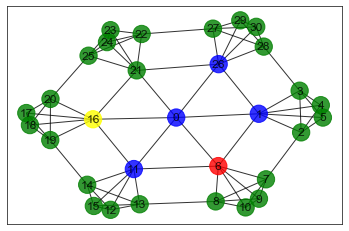

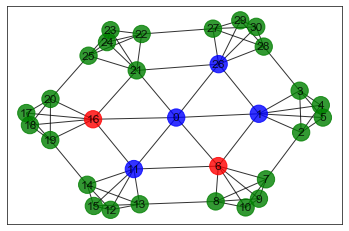

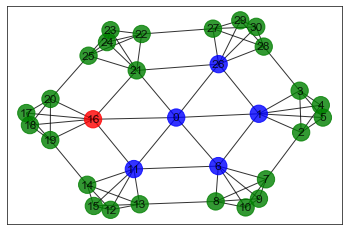

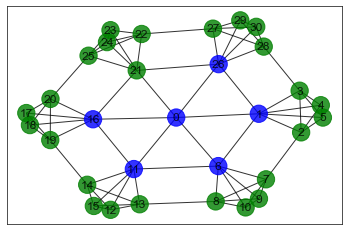

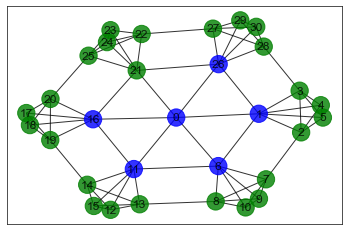

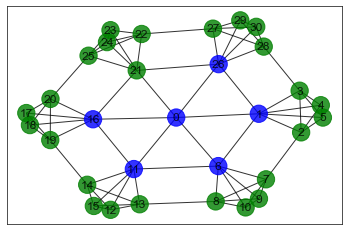

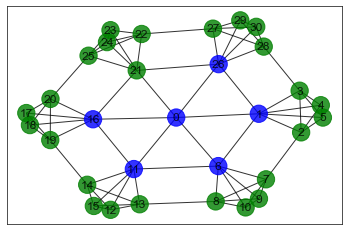

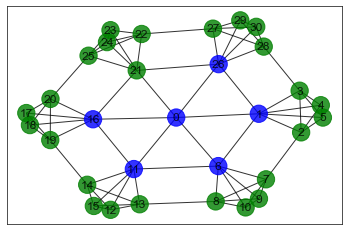

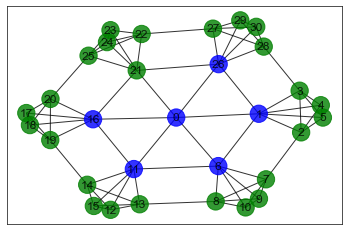

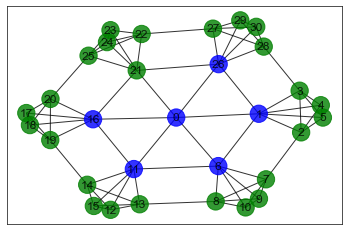

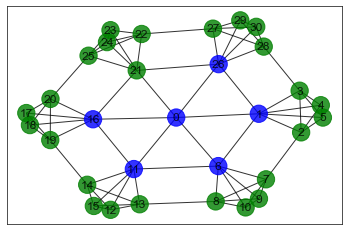

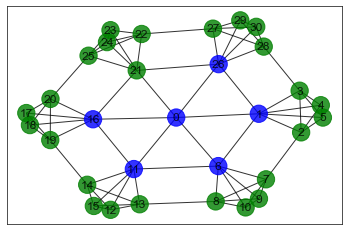

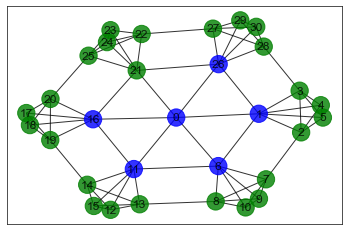

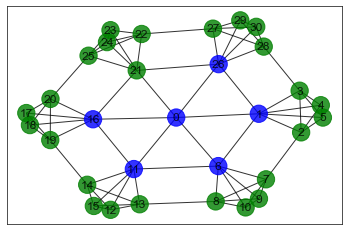

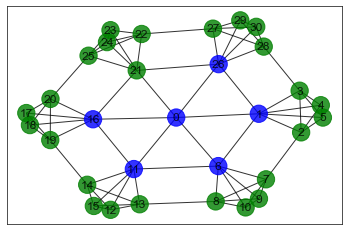

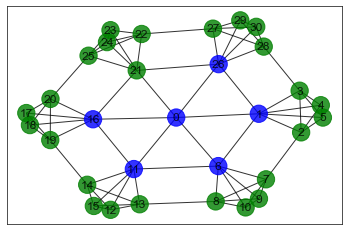

In [131]:
NumIter=30
for i in tqdm(range(NumIter)):
    DrawGraphSEIRS(G, model.X, pos)
    running = model.run_iteration()